<a href="https://colab.research.google.com/github/C-Little26/ECGR4105/blob/main/Hw3/ECGR4105Hw3_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#necessary libraries
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import the dataset
filepath_can = '/content/drive/My Drive/Machine Learning/Datasets/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(filepath_can))
cancer = cancer.drop('Unnamed: 32', axis=1) #was found to be null
cancer.isnull().sum()*100/cancer.shape[0] #use to check for null values

id                         0.0
diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: f

In [3]:
#define the function to remap the diagnosis
def binary_map(x):
    return x.map({"B": 1, "M": 0})

In [4]:
#remap diagnosis
varlist = ['diagnosis']
cancer[varlist] = cancer[varlist].apply(binary_map)
#create new vectors
Y = cancer.pop('diagnosis')
X = cancer.drop('id', axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#split between training and validation sets
x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size =0.2, random_state = 0)
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
338,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,...,11.16,26.84,71.98,384.0,0.1402,0.14020,0.1055,0.06499,0.2894,0.07664
427,10.80,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.05977,...,12.76,32.04,83.69,489.5,0.1303,0.16960,0.1927,0.07485,0.2965,0.07662
406,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,17.71,19.58,115.90,947.9,0.1206,0.17220,0.2310,0.11290,0.2778,0.07012
96,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.0498,0.05882,0.2227,0.07376
490,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,...,14.17,31.99,92.74,622.9,0.1256,0.18040,0.1230,0.06335,0.3100,0.08203


In [6]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_val = sc_x.fit_transform(x_val)

In [7]:
classifier = LogisticRegression(random_state=0) #unweighted logistic classifier
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [8]:
y_pred2 = classifier.predict(x_val)
cnfmatrix_2 = confusion_matrix(y_val, y_pred2)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred2))
print("Precision:",metrics.precision_score(y_val, y_pred2))
print("Recall:",metrics.recall_score(y_val, y_pred2))
print("F1 Score:", metrics.f1_score(y_val,y_pred2))

Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433
F1 Score: 0.962962962962963


Text(0.5, 427.9555555555555, 'Predicted label')

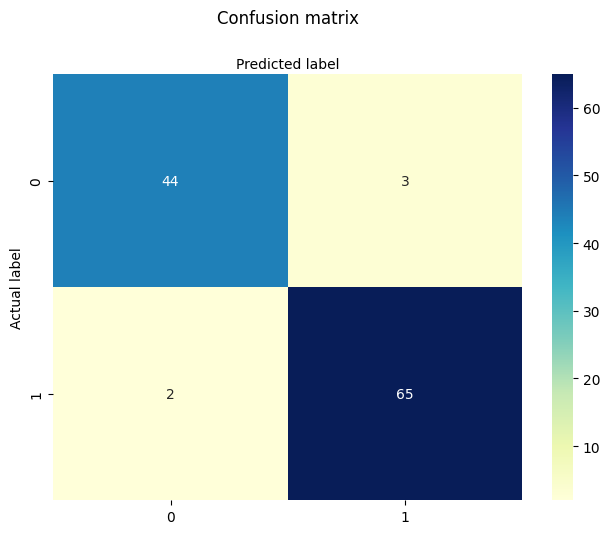

In [9]:
#draw confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sea.heatmap(pd.DataFrame(cnfmatrix_2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [10]:
#rerun classifier with penalty
c = 1.0 #penalty value
clf = LogisticRegression(penalty='l1', C=c, solver='saga')
clf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='l1', solver='saga')

In [11]:
y_pred2b = clf.predict(x_val)
cnfmatrix_2b = confusion_matrix(y_val, y_pred2b)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred2b))
print("Precision:",metrics.precision_score(y_val, y_pred2b))
print("Recall:",metrics.recall_score(y_val, y_pred2b))
print("F1 Score:", metrics.f1_score(y_val,y_pred2b))

Accuracy: 0.9736842105263158
Precision: 0.9571428571428572
Recall: 1.0
F1 Score: 0.9781021897810218


Text(0.5, 427.9555555555555, 'Predicted label')

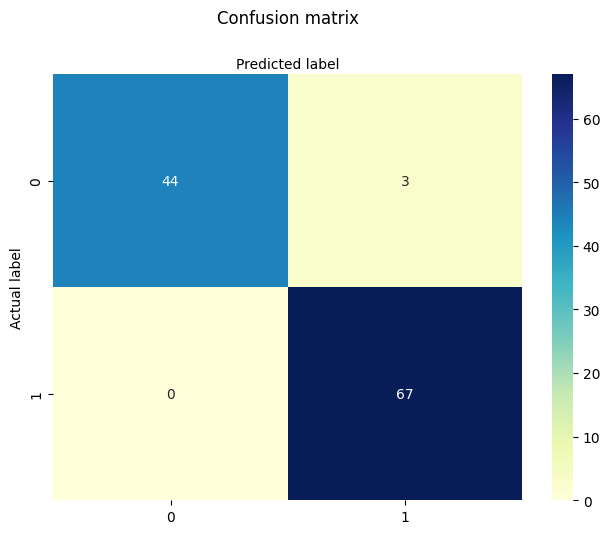

In [12]:
#draw confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sea.heatmap(pd.DataFrame(cnfmatrix_2b), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [13]:
naive = GaussianNB()
naive.fit(x_train, y_train)
y_pred3 = naive.predict(x_val)

In [14]:
cnfmatrix_3 = confusion_matrix(y_val, y_pred3)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred3))
print("Precision:",metrics.precision_score(y_val, y_pred3))
print("Recall:",metrics.recall_score(y_val, y_pred3))
print("F1 Score:", metrics.f1_score(y_val,y_pred3))

Accuracy: 0.9385964912280702
Precision: 0.9411764705882353
Recall: 0.9552238805970149
F1 Score: 0.9481481481481482


Text(0.5, 427.9555555555555, 'Predicted label')

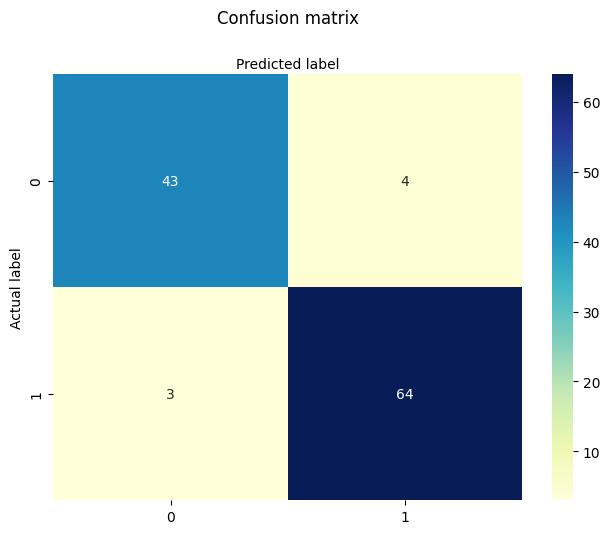

In [15]:
#draw confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sea.heatmap(pd.DataFrame(cnfmatrix_3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [16]:
#Problem 4, PCA Model for the Cancer Dataset

In [17]:
def reduceFeatures(x_t,x_v,K):
  pca = PCA(n_components=K)
  x_tr = pca.fit_transform(x_t)
  x_vr = pca.fit_transform(x_v)
  return x_tr, x_vr

In [18]:
#determine the optimal number of components
accuracy_high4 = 0.0
accuracies_4 = []
for K in range(1, 31):
  x_t4, x_v4 = reduceFeatures(x_train,x_val,K)
  clf4 = LogisticRegression(random_state=0)
  clf4.fit(x_t4, y_train)
  y_pred4 = clf4.predict(x_v4)

  #print("K:",K)
  #print("Accuracy:",metrics.accuracy_score(y_val, y_pred4))
  #print("Precision:",metrics.precision_score(y_val, y_pred4))
  #print("Recall:",metrics.recall_score(y_val, y_pred4))
  #print("F1 Score:", metrics.f1_score(y_val,y_pred4))
  accuracies_4.append(metrics.accuracy_score(y_val,y_pred4))
  if(metrics.accuracy_score(y_val,y_pred4) > accuracy_high4):
    accuracy_high_4 = metrics.accuracy_score(y_val,y_pred4)
    K_high4 = K
print("Most Accurate K value: ", K_high4)
print("Accuracy:", accuracy_high_4)

Most Accurate K value:  30
Accuracy: 0.9473684210526315


In [19]:
#rerun pca and regression at optimal value
clf4_f = LogisticRegression(random_state=0)
x_train4, x_val4 = reduceFeatures(x_train,x_val,K_high4)
clf4_f.fit(x_train4,y_train)
y_pred4_f = clf4_f.predict(x_val4)

In [20]:
#print data
cnfmatrix_4 = confusion_matrix(y_val, y_pred4_f)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred4_f))
print("Precision:",metrics.precision_score(y_val, y_pred4_f))
print("Recall:",metrics.recall_score(y_val, y_pred4_f))
print("F1 Score:", metrics.f1_score(y_val,y_pred4_f))

Accuracy: 0.9473684210526315
Precision: 0.9841269841269841
Recall: 0.9253731343283582
F1 Score: 0.9538461538461538


Text(0.5, 427.9555555555555, 'Predicted label')

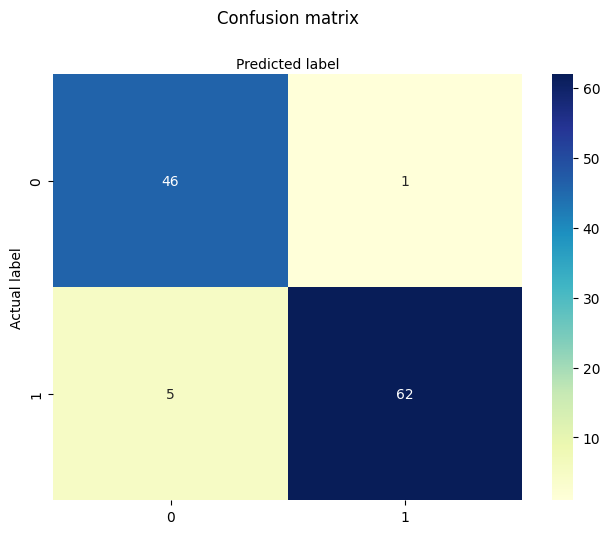

In [21]:
#draw confusion matrix
class_names=['M','B'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sea.heatmap(pd.DataFrame(cnfmatrix_4), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [22]:
#problem 5, pca with naive bayesian model
#determine the optimal number of components
accuracy_high5 = 0.0
accuracies_5 = []
for K in range(1, 31):
  x_t5, x_v5 = reduceFeatures(x_train,x_val,K)
  gnb5 = GaussianNB()
  gnb5.fit(x_t5, y_train)
  y_pred5 = gnb5.predict(x_v5)

  accuracies_5.append(metrics.accuracy_score(y_val,y_pred5))
  if(metrics.accuracy_score(y_val,y_pred5) > accuracy_high5):
    accuracy_high5 = metrics.accuracy_score(y_val,y_pred5)
    K_high5 = K
print("Most Accurate K value: ", K_high5)
print("Accuracy:", accuracy_high5)

Most Accurate K value:  4
Accuracy: 0.9298245614035088


In [24]:
#rerun pca and regression at optimal value
naive5 = GaussianNB()
x_train5, x_val5 = reduceFeatures(x_train,x_val,K_high5)
naive5.fit(x_train5,y_train)
y_pred5_f = naive5.predict(x_val5)

Accuracy: 0.9298245614035088
Precision: 0.927536231884058
Recall: 0.9552238805970149
F1 Score: 0.9411764705882353


Text(0.5, 427.9555555555555, 'Predicted label')

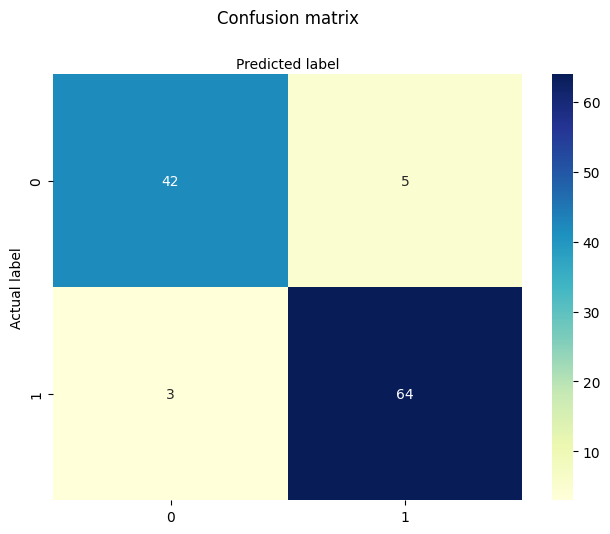

In [26]:
#print data
cnfmatrix_5 = confusion_matrix(y_val, y_pred5_f)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred5_f))
print("Precision:",metrics.precision_score(y_val, y_pred5_f))
print("Recall:",metrics.recall_score(y_val, y_pred5_f))
print("F1 Score:", metrics.f1_score(y_val,y_pred5_f))

#draw confusion matrix
class_names=['M','B'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sea.heatmap(pd.DataFrame(cnfmatrix_5), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')